In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn import datasets, linear_model ##Dataset

In [3]:
ventas = pd.read_csv('data/ventas.csv')
inventario = pd.read_csv('data/inventario.csv')
facturas = pd.read_csv('data/facturas.csv')
facturaProducto = pd.read_csv('data/facturaProducto.csv')
productos = pd.read_csv('data/productos.csv')
sharkLoin = pd.read_csv('data/shark-loin.csv')

In [4]:
facturaProd = facturaProducto[['id_factura', 'cantidad']]

facturaProd = facturaProducto.groupby(['id_factura'],as_index=False)['cantidad'].sum().sort_values(by=['id_factura'], ascending=True)

joinFactFP = pd.merge(facturas, facturaProd, on='id_factura')

joinFactFP.head()

relacionCantPag = joinFactFP[['totalpagado', 'cantidad']]

relacionCantPag.head()

,totalpagado,cantidad
0,2375,69
1,916,46
2,348,7
3,2350,86
4,429,15


In [5]:
X = relacionCantPag['cantidad'].values.reshape(-1,1) # Como X solo tiene 1 tenemos que 'reshape' para asegurar que siga siendo una matrix (array) y no un vector (-1,)
y = relacionCantPag['totalpagado'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (453, 1)
La forma de y_train es:  (453,)
La forma de X_test es:  (195, 1)
La forma de y_test es:  (195,)


In [7]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_train, y_train)

LinearRegression()

In [8]:
y_fit = regresor.predict(X_train) # Valores ajustados durante el entrenamiento
y_pred = regresor.predict(X_test)  # Valores resultantes con la nueva información

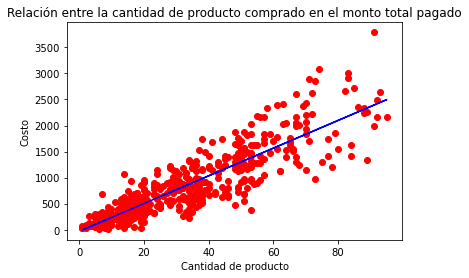

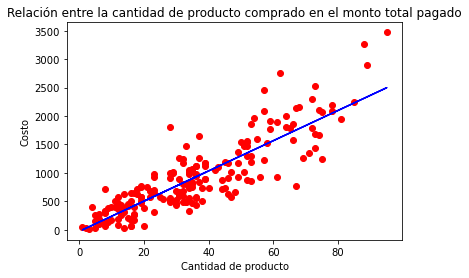

In [9]:
# Para el conjunto de entrenamiento
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_fit, color = 'blue')
plt.title('Relación entre la cantidad de producto comprado en el monto total pagado')
plt.xlabel('Cantidad de producto')
plt.ylabel('Costo')
plt.show()

# Para el conjunto de validación
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Relación entre la cantidad de producto comprado en el monto total pagado')
plt.xlabel('Cantidad de producto')
plt.ylabel('Costo')
plt.show()

In [10]:
from statsmodels.tools.eval_measures import rmse
RMSE = np.sum(rmse(y_pred, y_test))/len(y)
print('RMSE = ', RMSE)

RMSE =  0.504229214752227


In [12]:
lr = linear_model.LinearRegression() ##Declaración del algoritmo a utilizar.

#Entreno el modelo
lr.fit(X_train, y_train)

#Realizo una predicción
Y_pred = lr.predict(X_test)

In [13]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "w":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "w":
[26.61444219]
Valor de la intersección o coeficiente "b":
-31.095740300494526

La ecuación del modelo es igual a:
y =  [26.61444219] x  -31.095740300494526


In [14]:
def precio(productos):
    Y = lr.coef_[0]*productos + lr.intercept_
    return Y

# Predicción 1:

In [16]:
print("Costo aproximado en relación a la cantidad de productos comprados")
print("")
print("El precio de una compra con 10 productos será de: " + str(precio(5)) + " dolares")
print("")
print("El precio de una compra con 10 productos será de: " + str(precio(12)) + " dolares")
print("")
print("El precio de una compra con 10 productos será de: " + str(precio(32)) + " dolares")

Costo aproximado en relación a la cantidad de productos comprados

El precio de una compra con 10 productos será de: 101.97647064347345 dolares

El precio de una compra con 10 productos será de: 288.2775659650286 dolares

El precio de una compra con 10 productos será de: 820.5664097409004 dolares


In [17]:
sharkStock = inventario.loc[inventario['id_producto'] == 48]
sharkStock = sharkStock[['id_fp', 'hora']]

registroShark = pd.merge(sharkStock, sharkLoin, on='id_fp')
registroShark = registroShark[['hora', 'suma']]


registroShark

,hora,suma
0,2021-06-12 10:00:00,2
1,2021-06-12 10:00:00,14
2,2021-06-12 11:00:00,17
3,2021-06-12 11:00:00,27
4,2021-06-12 12:00:00,34
...,...,...
200,2021-06-18 18:00:00,1649
201,2021-06-18 18:00:00,1659
202,2021-06-18 18:00:00,1668
203,2021-06-18 19:00:00,1683


In [18]:
new = registroShark["hora"].str.split(" ", n = 1, expand = True)
registroShark["Dia"]= new[0]
registroShark = registroShark.drop(columns=['hora'])

In [19]:
registroShark["Dia"].replace({
    "2021-06-12": "1", 
    "2021-06-13": "2", 
    "2021-06-14": "3", 
    "2021-06-15": "4", 
    "2021-06-16": "5", 
    "2021-06-17": "6", 
    "2021-06-18": "7", 
    }, inplace=True)

In [21]:
registroShark = registroShark.groupby(['Dia'],as_index=False)['suma'].sum().sort_values(by=['Dia'], ascending=True)
registroShark

,Dia,suma
0,1,4005
1,2,9842
2,3,12338
3,4,24039
4,5,36295
5,6,40745
6,7,49394


In [22]:
X2 = registroShark['Dia'].values.reshape(-1,1) # Como X solo tiene 1 tenemos que 'reshape' para asegurar que siga siendo una matrix (array) y no un vector (-1,)
y2 = registroShark['suma'].values

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)
print('La forma de X_train2 es: ', X_train2.shape)
print('La forma de y_train2 es: ', y_train2.shape)
print('La forma de X_test2 es: ', X_test2.shape)
print('La forma de y_test2 es: ', y_test2.shape)

La forma de X_train2 es:  (4, 1)
La forma de y_train2 es:  (4,)
La forma de X_test2 es:  (3, 1)
La forma de y_test2 es:  (3,)


In [24]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_train2, y_train2)

LinearRegression()

In [25]:
y_fit2 = regresor.predict(X_train2) # Valores ajustados durante el entrenamiento
y_pred2 = regresor.predict(X_test2)  # Valores resultantes con la nueva información

In [ ]:
# Para el conjunto de entrenamiento
plt.scatter(X_train2, y_train2, color = 'red')
plt.plot(X_train2, y_fit2, color = 'blue')
plt.title('Relación entre la cantidad de producto comprado en el monto total pagado')
plt.xlabel('Cantidad de producto')
plt.ylabel('Costo')
plt.show()

# Para el conjunto de validación
plt.scatter(X_test2, y_test2, color = 'red')
plt.plot(X_test2, y_pred2, color = 'blue')
plt.title('Relación entre la cantidad de producto comprado en el monto total pagado')
plt.xlabel('Cantidad de producto')
plt.ylabel('Costo')
plt.show()

In [ ]:
from statsmodels.tools.eval_measures import rmse
RMSE = np.sum(rmse(y_pred, y_test))/len(y)
print('RMSE = ', RMSE)

In [ ]:
lr = linear_model.LinearRegression() ##Declaración del algoritmo a utilizar.

#Entreno el modelo
lr.fit(X_train, y_train)

#Realizo una predicción
Y_pred = lr.predict(X_test)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "w":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)

In [ ]:
def numero(productos):
    Y = lr.coef_[0]*productos + lr.intercept_
    return Y

# Predicción 2:

In [ ]:
print("El número de SharkLoins vendidos para el día 8 es de")
print("")
print("El número de Shark - Loins vendidos para el día 8 es de:" + str(numero(9)) + " Shark - Loins")